### Linear Regression with PyTorch - from Scratch

We're covering the below topics :

- Introduction to linear regression and gradient descent (optimization)
- Implementing a linear regression model using PyTorch tensors
- Training a linear regression model using gradient descent algorithm
- Implementing gradient descent and linear regression using PyTorch built-in

We'll discuss one of the foundational algorithms - "Linear regression" with PyTorch using housing dataset.

```
x = {crim, rm, age} <br>
y = {medv}

```

In a linear regression model, target is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias (intercept):

```
y_hat = w1 * crim + w2 * rm + w3 *age + b
```

The model training process of linear regression is to figure out a set of weights w1, w2,w3 & b by looking at the training data, to make accurate predictions for new data (i.e. to predict the median house price by using crim, rm and age variables).
This optimization is by adjusting the weights and bias slightly multiple times to make more accurate predictions. The optimization technique is called gradient descent.



In [1]:
# Import the necessary libraries
import torch
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

np.set_printoptions(suppress=True)

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training data

We'll create X and y Tensors seperately


In [3]:
x = np.array([[0.00632, 6.575, 65.2],
              [0.18337, 5.414, 98.3],
              [0.06588, 7.765, 83.3],
              [0.02009, 8.034, 31.9],
              [0.43571, 5.344, 100],
              [0.10469, 7.267, 49]], dtype='float32')
y = np.array([24, 7, 39.8, 50, 20, 33.2], dtype='float32') #medv
y = y.reshape(6,1)

In [4]:
x, y

(array([[  0.00632,   6.575  ,  65.2    ],
        [  0.18337,   5.414  ,  98.3    ],
        [  0.06588,   7.765  ,  83.3    ],
        [  0.02009,   8.034  ,  31.9    ],
        [  0.43571,   5.344  , 100.     ],
        [  0.10469,   7.267  ,  49.     ]], dtype=float32),
 array([[24. ],
        [ 7. ],
        [39.8],
        [50. ],
        [20. ],
        [33.2]], dtype=float32))

In [5]:
x=torch.from_numpy(x) #input
y=torch.from_numpy(y) #target

In [6]:
x, y

(tensor([[6.3200e-03, 6.5750e+00, 6.5200e+01],
         [1.8337e-01, 5.4140e+00, 9.8300e+01],
         [6.5880e-02, 7.7650e+00, 8.3300e+01],
         [2.0090e-02, 8.0340e+00, 3.1900e+01],
         [4.3571e-01, 5.3440e+00, 1.0000e+02],
         [1.0469e-01, 7.2670e+00, 4.9000e+01]]),
 tensor([[24.0000],
         [ 7.0000],
         [39.8000],
         [50.0000],
         [20.0000],
         [33.2000]]))

In [7]:
# initialize w and b

w=torch.randn(1, 3, requires_grad=True)
b=torch.randn(1, requires_grad=True)
w, b

(tensor([[ 1.1624, -1.1662, -0.4484]], requires_grad=True),
 tensor([-0.6803], requires_grad=True))

In [8]:
def model(x):
    preds = x @ w.T + b
    return preds

def mse(y, preds):
    return torch.mean((y-preds)**2)

In [9]:
lr=0.0001
for epoch in range(1000):
    preds = model(x) #forward
    loss = mse(y, preds)
    loss.backward() #backward

    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()


In [10]:
loss

tensor(45.4975, grad_fn=<MeanBackward0>)

In [11]:
preds

tensor([[27.8778],
        [16.9906],
        [32.1198],
        [40.6711],
        [16.6370],
        [34.1012]], grad_fn=<AddBackward0>)

In [12]:
y

tensor([[24.0000],
        [ 7.0000],
        [39.8000],
        [50.0000],
        [20.0000],
        [33.2000]])

### Reading the data using Dataset and DataLoader class

In [13]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

In [14]:
# Create a custom dataset
# medv is target variable : median value of house (in 1000's of dollars)

class customDataset(Dataset):

    def __init__(self):
        data = pd.read_csv("./drive/MyDrive/files/BostonHousing.csv")
        data=data.fillna(0)
        X_data = data[[col for col in data.columns if col not in ["medv"]]]
        scaler = StandardScaler()
        X_data = scaler.fit_transform(X_data)
        self.x = torch.from_numpy(np.array(X_data))
        self.y = torch.from_numpy(np.array(data["medv"])).reshape(len(data), 1)
        self.n_samples = len(data)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples


In [15]:
# Create custom dataset object
dataset=customDataset()

In [16]:
# create data loader object
dataloader=DataLoader(dataset=dataset, batch_size=11, shuffle=True)
data_iter = iter(dataloader)

In [17]:
# Get the number of observations in the dataset
dataset.__len__()

506

In [18]:
# Number of iterations = n_samples/batch_size
506/11

46.0

In [19]:
# Get x, y data - read by batch size. "iterations" indicate number of iterations
iterations = 0
for i, (x, y) in enumerate(data_iter):
    # print (i, x, y)
    iterations = iterations+1

In [20]:
iterations

46

In [21]:
# Regression using pytorch built-ins

import torch.nn as nn
import torch.optim as optim

In [31]:
class mlp(nn.Module):
    def __init__(self, in_size, h1_size, h2_size, out_size):
        super(mlp, self).__init__()

        # layers
        self.h1 = nn.Linear(in_size, h1_size)
        self.h2 = nn.Linear(h1_size, h2_size)
        self.output = nn.Linear(h2_size, out_size)

    def forward(self, x):
        z1 = torch.relu(self.h1(x))
        z2 = torch.relu(self.h2(z1))
        preds = self.output(z2)

        return preds

In [32]:
# Generate sample data
dataset = customDataset()
dataloader=DataLoader(dataset=dataset, batch_size=11, shuffle=True)
x, y = next(iter(dataloader))

# Create model object
model = mlp(13, 100, 50, 1)

# Create optimizer object
opt = optim.SGD(model.parameters(), lr=1e-3)

# Forward pass
preds = model.forward(x.float())
# calculate loss
mse = nn.MSELoss()
loss = mse(preds, y.float())
print("mse: ", loss.item())

# Backward pass
loss.backward()

# Parameter updates
opt.step() #step function is going to update weights and bias in the network

# zero the gradients
opt.zero_grad()


### Model Training

In [39]:
dataset.n_samples

506

In [41]:
dataloader=DataLoader(dataset=dataset, batch_size=64, shuffle=True)
model = mlp(13, 100, 50, 1)
mse = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=1e-3)

In [42]:
# Model training process

avg_loss_vals = list()
epoch_vals = list()
for epoch in range(100):
    losses = list()
    iters = 0
    for i, (x, y) in enumerate(iter(dataloader)):
        opt.zero_grad()
        preds = model.forward(x.float())
        loss = mse(preds, y.float())
        loss.backward() # all gradients are computed
        opt.step() # update model parameters
        losses.append(loss.item())
        iters = iters + 1
    avg_loss = np.sum(losses)/iters
    avg_loss_vals.append(avg_loss)
    epoch_vals.append(epoch)

In [44]:
len(avg_loss_vals)

100

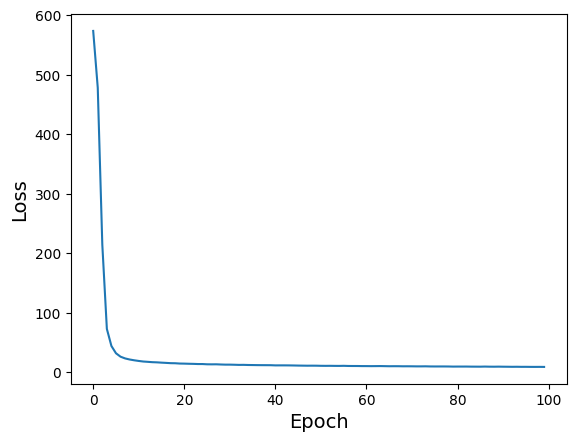

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(epoch_vals, avg_loss_vals)
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel("Loss", size=14)
plt.show()